In [2]:
%pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp312-cp312-linux_x86_64.whl size=4498200 sha256=2d1647ac66e17b6579552abef6b2ad57287914b3e6e73bd13049cac3a7ae6756
  Stored in directory: /root/.cache/pip/wheels/20/27/95/a7baf1b435f1cbde017cabdf1e9688526d2b0e929255a359c6
Successfully built fasttext


In [3]:
import pandas as pd
import fasttext
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Baca dataset
df = pd.read_csv("/content/dataset_laptop_preprocessed_v4.csv")

In [ ]:
# Baca dataset
df2 = pd.read_csv("/content/dataset_laptop_preprocessed_v5.csv")

In [ ]:
# Format FastText: __label__<label> <text>
df['fasttext_format'] = '__label__' + df['label_rekomendasi'] + ' ' + df['preprocessed']

In [ ]:
# Format FastText: __label__<label> <text>
df2['fasttext_format'] = '__label__' + df2['label_rekomendasi'] + ' ' + df2['preprocessed']

In [ ]:
# Simpan ke file txt
df['fasttext_format'].to_csv("fasttext_train.txt", index=False, header=False)

In [ ]:
# Simpan ke file txt
df2['fasttext_format'].to_csv("fasttext_train_v2.txt", index=False, header=False)

In [ ]:
# Latih model dalam mode supervised
model = fasttext.train_supervised(input="fasttext_train.txt", epoch=25, lr=1.0, wordNgrams=3, dim=100)

In [ ]:
# Latih model dalam mode supervised
model2 = fasttext.train_supervised(input="fasttext_train_v2.txt", epoch=25, lr=1.0, wordNgrams=3, dim=100)

In [ ]:
# Simpan model
model.save_model("fasttext_model.bin")

In [ ]:
# Simpan model
model2.save_model("fasttext_model_v2.bin")

In [ ]:
# testing model FastText
vector = model.get_sentence_vector("butuh laptop ringan untuk desain dan kuliah")
print(vector)  # Ini adalah array numpy 1x100 (default dim=100)

[ 0.02519901  0.02801073  0.04260302  0.00256055  0.08017278  0.0540574
 -0.0019919  -0.0113029   0.02021843  0.060173   -0.00858611  0.03464733
 -0.02526756 -0.02962231 -0.02792987  0.00276949 -0.0073286   0.00373018
 -0.00384415 -0.07123937  0.0184042   0.03669114  0.04142814 -0.02153415
  0.01247993  0.02847604 -0.01342153 -0.04152843  0.01530912  0.06891087
  0.00925572 -0.00686741 -0.06066702 -0.04160795 -0.03973616  0.02063812
 -0.06543293  0.02760906 -0.03310566 -0.00826279 -0.05177123  0.02619877
 -0.01555895  0.12288406  0.04567067 -0.0237511   0.07087424 -0.03623767
 -0.07144564 -0.00695664 -0.00082605  0.03403454 -0.03560085  0.00738177
 -0.02899928 -0.01444369 -0.01701149  0.02558577  0.00985308  0.00874657
 -0.04680043  0.03817027  0.00869056  0.03566363  0.02648337  0.02306808
 -0.06439101  0.03813764  0.04086892 -0.02828488 -0.03313735 -0.00542746
  0.02758323 -0.03026819 -0.03120233 -0.0242121   0.03632022 -0.0427646
 -0.03083998 -0.02419302  0.00222915  0.05976873  0.0

In [ ]:
# Testing model FastText
vector2 = model2.get_sentence_vector("butuh laptop coding multitasking")
print(vector2)  # Ini adalah array numpy 1x100 (default dim=100)

[ 0.07029578 -0.01695645  0.01642874  0.14041488 -0.0414777  -0.07928361
  0.03256996  0.06723849 -0.07891616 -0.04457221  0.02111895 -0.07599466
  0.06228983 -0.01743566  0.02038907  0.02481415  0.10307518 -0.00836507
  0.05091478  0.01845921  0.03053861 -0.07094246 -0.07411052  0.01318958
  0.02609657  0.01335077 -0.01513471  0.05047002  0.06410259 -0.07129426
  0.02048407 -0.02834191  0.11417934 -0.03803664  0.05788247 -0.11817084
  0.03248479  0.01263146  0.01637112 -0.00527911  0.02386295 -0.12123294
  0.05736142 -0.04715253 -0.06626156  0.13079794 -0.05311571  0.04915344
 -0.04350012  0.00059372  0.1258606  -0.15837124  0.10370867 -0.00425128
  0.06088289  0.04634696  0.06765901 -0.02068236 -0.04910722 -0.0426131
  0.05994366  0.02549178 -0.14112842  0.02588069  0.05368015 -0.06386319
 -0.00395859  0.01361203  0.02711977  0.03183728  0.09545098 -0.05824102
 -0.01827227  0.05855445  0.02206041  0.02181189 -0.01463584  0.02400436
 -0.03342319  0.06580681 -0.07091172 -0.0608201  -0.

In [ ]:
# Load model yang sudah di-train
model = fasttext.load_model('/content/fasttext_model.bin')

In [ ]:
# Load model yang sudah di-train
model2 = fasttext.load_model('/content/fasttext_model_v2.bin')

In [ ]:
# Uji representasi vektor dari kata
vector = model.get_word_vector("laptop")
print(vector)

[-0.1812188   0.23452123  0.0806727  -0.14825894  0.16002478  0.31128827
 -0.0251294   0.1295587   0.1982523   0.10409936 -0.3446702  -0.16284876
  0.28905502  0.20623371 -0.33822963 -0.07464623  0.3699487  -0.14330426
 -0.20491868  0.00437611 -0.11692043  0.52684486  0.07168122  0.16736686
 -0.2507544  -0.25924197 -0.06085183  0.05543063 -0.2109676   0.13534856
 -0.40493536 -0.06744929 -0.01651032 -0.34685832 -0.5640398  -0.2221787
  0.09428061 -0.06634268 -0.08365432 -0.14994976  0.01478121  0.35895485
  0.11365213  0.01168593  0.04931564 -0.17130515  0.16722162 -0.00173427
 -0.07254324  0.28693348 -0.13101976  0.27488083 -0.12588309  0.3064309
 -0.3724971  -0.05154248 -0.35664853  0.0971515   0.25107592  0.21645746
  0.08550826  0.3650893  -0.02018921  0.15850654 -0.03011848 -0.1361827
 -0.34747076  0.0292178  -0.05221097  0.05483763 -0.3655866  -0.06586453
 -0.07523876  0.14046545 -0.24540994  0.09854323  0.15432683  0.5620199
  0.28072003  0.37902975 -0.15426633 -0.18407303  0.458

In [ ]:
# Uji representasi vektor dari kata
vector2 = model2.get_word_vector("laptop")
print(vector2)

[ 0.12884507  0.18608795  0.10374001 -0.17014186  0.02363979  0.31515715
 -0.11086563  0.25112614  0.21312521  0.10906909  0.1330658  -0.00827436
 -0.14729652  0.48586372 -0.20515127 -0.02015582  0.28389198  0.16824557
 -0.3368856  -0.08211429 -0.02041962  0.35022655  0.15423305 -0.3805754
  0.01375857 -0.20990306 -0.0947476   0.18420285  0.07001988  0.19083256
  0.22459924 -0.10867318  0.11618261 -0.5547006   0.18490712 -0.24122006
 -0.02302789 -0.03032447  0.01450459 -0.26593134  0.11277582  0.11448561
  0.03939894  0.08472633  0.6152883  -0.04849536 -0.28653237  0.28662208
 -0.20673789 -0.07057058  0.03930421 -0.06421688 -0.14404784  0.24473043
  0.03229873  0.09523343 -0.4554407   0.00415675  0.30330256  0.1237696
 -0.04546735  0.1970731   0.12628295  0.4059135   0.2661409   0.1523532
 -0.29114118 -0.27147615  0.04774818  0.14656298  0.15178914  0.3785033
 -0.3034332  -0.40569314  0.02035131  0.05632815  0.225726    0.2886134
 -0.1708204   0.21190944 -0.25987032  0.03690758 -0.1004

In [ ]:
# Mengecek kata-kata yang mirip
print(model.get_nearest_neighbors("desain"))

[(0.9548562169075012, '3d'), (0.9526961445808411, 'rendering'), (0.9142265319824219, 'arsitektur'), (0.9108772873878479, 'matlab'), (0.8751953840255737, 'pemodelan'), (0.8570871949195862, 'animasi'), (0.8361861109733582, 'layar'), (0.8185718059539795, 'leluasa'), (0.8135718107223511, 'cocok'), (0.8078510165214539, 'lebar')]


In [ ]:
# Mengecek kata-kata yang mirip
print(model2.get_nearest_neighbors("ngoding"))

[(0.0, 'desain'), (0.0, 'laptop'), (0.0, 'kerja'), (0.0, 'membutuhkan'), (0.0, 'cari'), (0.0, 'menjalankan'), (0.0, 'berat'), (0.0, 'biar'), (0.0, 'backlit'), (0.0, 'emulator')]


In [ ]:
# Ubah text menjadi vektor menggunakan FastText
def text_to_vector(text):
    return model.get_sentence_vector(text)

X = np.array([text_to_vector(text) for text in df['preprocessed']])
y = df['label_rekomendasi']

In [ ]:
# Ubah text menjadi vektor menggunakan FastText
def text_to_vector(text):
    return model2.get_sentence_vector(text)

I = np.array([text_to_vector(text) for text in df2['preprocessed']])
J = df2['label_rekomendasi']

In [ ]:
# Split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=42)
#X_train, y_train = X, y
#X_test, y_test = X, y

In [ ]:
# Split data train dan test
I_train, I_test, J_train, J_test = train_test_split(I, J, train_size=0.25, random_state=42)

In [ ]:
# Training Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Training Random Forest
rf_classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier2.fit(I_train, J_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Prediksi dan evaluasi
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(y_test, y_pred))

Akurasi: 0.9147286821705426
              precision    recall  f1-score   support

      gaming       0.80      1.00      0.89         8
  multimedia       0.00      0.00      0.00        10
      office       1.00      1.00      1.00        43
 programming       1.00      0.97      0.99        34
 workstation       0.79      1.00      0.88        34

    accuracy                           0.91       129
   macro avg       0.72      0.79      0.75       129
weighted avg       0.85      0.91      0.88       129



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Prediksi dan evaluasi
J_pred = rf_classifier2.predict(I_test)
accuracy = accuracy_score(J_test, J_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(J_test, J_pred))

Akurasi: 0.8962264150943396
              precision    recall  f1-score   support

      gaming       0.78      1.00      0.88         7
  multimedia       0.00      0.00      0.00        10
      office       1.00      1.00      1.00        38
 programming       1.00      0.94      0.97        16
 workstation       0.80      1.00      0.89        35

    accuracy                           0.90       106
   macro avg       0.71      0.79      0.75       106
weighted avg       0.82      0.90      0.85       106



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


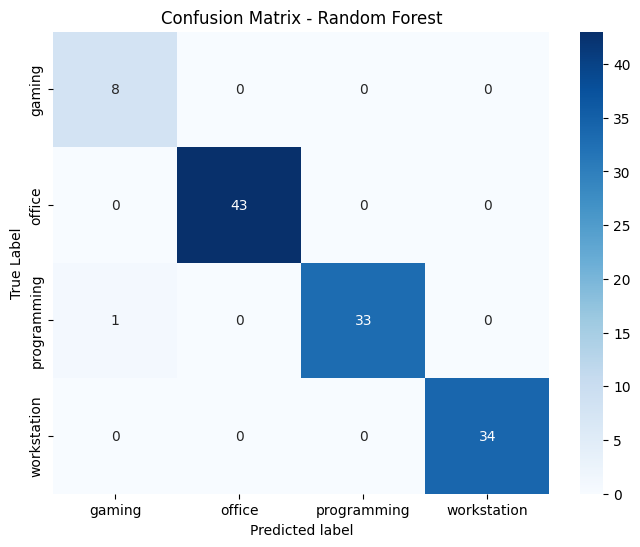

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_classifier.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

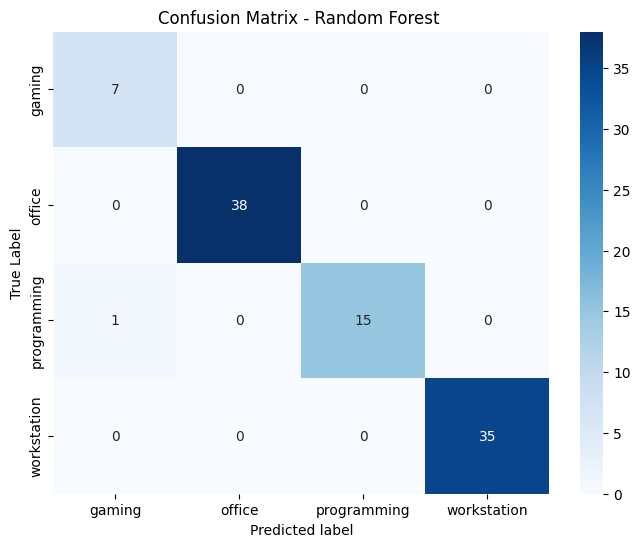

In [ ]:
# Confusion Matrix
cm2 = confusion_matrix(J_test, J_pred, labels=rf_classifier2.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier2.classes_, yticklabels=rf_classifier2.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest ')
plt.show()

In [ ]:
# Menggunakan 5-Fold Cross Validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

print("Hasil Cross_validation (5-Fold)")
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nRata-rata Akurasi: {np.mean(cv_scores):.4f}")
print(f"Standar Deviasi: {np.std(cv_scores):.4f}")

print(f"Cross Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

Hasil Cross_validation (5-Fold)
Fold 1: 0.9714
Fold 2: 1.0000
Fold 3: 0.9412
Fold 4: 0.9706
Fold 5: 1.0000

Rata-rata Akurasi: 0.9766
Standar Deviasi: 0.0220
Cross Validation Scores: [0.97142857 1.         0.94117647 0.97058824 1.        ]
Mean CV Score: 0.976638655462185


In [ ]:
# Menggunakan 5-Fold Cross Validation
cv_scores2 = cross_val_score(rf_classifier2, I, J, cv=5, scoring='accuracy')

print("Hasil Cross_validation (5-Fold)")
for i, score in enumerate(cv_scores2, start=1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nRata-rata Akurasi: {np.mean(cv_scores2):.4f}")
print(f"Standar Deviasi: {np.std(cv_scores2):.4f}")

print(f"Cross Validation Scores: {cv_scores2}")
print(f"Mean CV Score: {np.mean(cv_scores2)}")

Hasil Cross_validation (5-Fold)
Fold 1: 0.9655
Fold 2: 1.0000
Fold 3: 0.9286
Fold 4: 0.9643
Fold 5: 1.0000

Rata-rata Akurasi: 0.9717
Standar Deviasi: 0.0267
Cross Validation Scores: [0.96551724 1.         0.92857143 0.96428571 1.        ]
Mean CV Score: 0.9716748768472907


In [ ]:
# ===================== VISUALISASI =========================

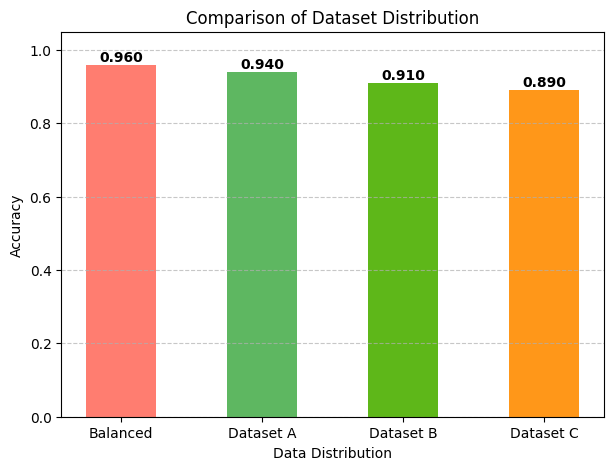

In [4]:
# ==============================
# 🎯 Visualisasi Perbandingan Akurasi (Balanced vs Imbalanced)
# ==============================
balanced = 0.96
dataset_A = 0.94
dataset_B = 0.91
dataset_C = 0.89

# Buat list untuk visualisasi
kategori = ['Balanced', 'Dataset A', 'Dataset B', 'Dataset C']
accuracy_scores = [balanced, dataset_A, dataset_B, dataset_C]



plt.figure(figsize=(7,5))
bars = plt.bar(kategori, accuracy_scores,
               color=['#FF6F61', '#4CAF50', '#4CAF00', '#FF8C00'], alpha=0.9, width=0.5)

plt.ylim(0, 1.05)
plt.title('Comparison of Dataset Distribution')
plt.xlabel('Data Distribution')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan nilai akurasi di atas batang
for bar, acc in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width()/2, acc + 0.01,
             f"{acc:.3f}", ha='center', fontsize=10, fontweight='bold')

plt.show()